In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm.notebook as tqdm

from scipy.stats import chi2_contingency

%matplotlib inline

# RGR Data Test #
## Background ##
At Deliveroo we want to understand our customers, rider and restaurants in as much detail as possible. As we attempt to build and maintain the optimal rider fleet we utilise a series of
marketing channels and schemes to attract new riders. One of these channels is referred to as
‘Rider Get Rider’ or ‘RGR’, which is an incentivised referral scheme targeting current Deliveroo
riders.
## The task ##
Imagine you have been asked to give a 30 minute presentation to Deliveroo’s senior leadership
team. The topic for the presentation is: “Rider Get Rider’ channel performance
1. How has RGR performed? How does that compare with other channels?
2. Is RGR a successful scheme? Should it be changed?
3. If it should be changed, what are some important factors which should be considered?

The data we have provided you with a fictional sample of marketing channel performance data with the following fields:
1. Rider ID – a unique rider identifier
2. Location – the city the rider applied in
3. Application_date – the date the rider applied to work for Deliveroo
4. Application_approved_date – the date that the rider application was approved
5. First_work_date – the date of the rider’s first shift
6. Acquisition_channel – the last touch marketing channel recorded for the rider/applicant
7. Vehicle_type – the type of vehicle the rider uses
8. Days_since_acquisition – the number of days passed since first_work_date
9. Hours_worked_cumulative – the cumulative number of hours worked by the rider to date
10.  Orders_delivered_cumulative – the cumulative number of orders delivered by the rider to date
11.  Throughput_cumulative: The cumulative throughput (orders/hour) of the rider to date
12.  Referrals_cumulative – The cumulative number of referrals made by that rider to date
13.  Succussful_referrals_cumulative – the cumulative number of successful referrals made by that rider to date

## What we are looking for from you: ##
In this test we are looking for you to:
1. Manipulate data to draw insights & then communicate these insights effectively to senior non-technical colleagues
2. Consider and deal with ‘edge cases’ or ‘irregularities’ in the data
3. Present your findings in a clear and concise manner relevant to briefings for senior executives
4. Discuss what you’d do next, such as what other data would you have liked to bring this research to life more

## Tips for completing the test: ##
1. You can undertake the analysis using whichever tools or techniques you like (e.g. R, Tableau, Excel etc..). We suggest you use the tools you are most familiar and comfortable with.
2. The output of your work should be appropriate for your imaginary audience (eg. Deliveroo’s Senior Leadership Team).
3. Don’t over complicate it.

--------------------------------

# Outline of solution #
TELL A STORY!

Before touching the data, let's come up with a general plan of attack. Loosely

## Figure out some KPI's / metric's that indicate performance ##
We want to keep this fairly simple. There are 4 categories to focus on. (THIS IS MY CONTENTS PAGE)
- Acquisition: How many customers are we acquiring?
- Engagement: How many daily active users do we have?
- Retention: How long does it take before a customer churns?
- Revenue: How much money are we making?
We want to compare these between channels e.g. "organic has less churn than other channels, because riders are more motivated".

#### Acquisition ####
This is about acquiring new riders via referrals
1. Percentage of riders who have come through the referral scheme
2. Percentage referrals that are successful

#### Engagement ####
This is about current riders using the scheme
1. Number of referrals made over time
2. Number of times referral bonus' have been payed out
3. Amount of referrals and successful referrals made by riders after some time

#### Retention ####
1. Retention time - do referred people stick around more or less than others?
2. Churned after (3 months, 6 months)

#### Revenue ####
1. Average profit made per rider
2. Average throughput per rider

## Verify data  ##
1. Make sure the cumulative columns really are cumulative
2. Check throughput columns does agree with orders/hours

## EDA + cleaning ##
1. Perform some initial plotting and EDA
2. Clean as I go along
3. Look out for outliers/exteremem's


## Compute metrics and visualise ##
Pretty self-explanatory.

## Discussion ##
There are 0 data points of people who applied but didn't ever start. It would be useful to have also riders who applied and had a nan WORK_START_DATE

----------------------------------------------------

# Prepare data #
We being by loading the dataframe.
## Load Data ##

In [2]:
df = pd.read_csv('rgr_data_test (1).csv')

# Fill the empty referalls to 0
df.REFERRALS_CUMULATIVE = df.REFERRALS_CUMULATIVE.fillna(0)
df.SUCCESSFUL_REFERRALS_CUMULATIVE = df.SUCCESSFUL_REFERRALS_CUMULATIVE.fillna(0)

# Convert columns to datetime's
df.APPLICATION_DATE = pd.to_datetime(df.APPLICATION_DATE)
df.APPLICATION_APPROVED_DATE = pd.to_datetime(df.APPLICATION_APPROVED_DATE)
df.FIRST_WORK_DATE = pd.to_datetime(df.FIRST_WORK_DATE)

days = df.DAYS_SINCE_ACQUISITION.unique()

df

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,73350,Roo de Janeiro,2016-10-29,2016-11-07,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,0.0,0.0
1,73350,Roo de Janeiro,2016-10-29,2016-11-07,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,0.0,0.0
2,73350,Roo de Janeiro,2016-10-29,2016-11-07,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,0.0,0.0
3,73350,Roo de Janeiro,2016-10-29,2016-11-07,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,0.0,0.0
4,73350,Roo de Janeiro,2016-10-29,2016-11-07,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31033,101217,Roo York,2017-02-27,2017-03-18,2017-03-18,Digital,Scooter / Motorcycle,14,29.6,61,2.06,0.0,0.0
31034,101217,Roo York,2017-02-27,2017-03-18,2017-03-18,Digital,Scooter / Motorcycle,28,55.5,123,2.22,0.0,0.0
31035,101217,Roo York,2017-02-27,2017-03-18,2017-03-18,Digital,Scooter / Motorcycle,56,62.8,138,2.20,0.0,0.0
31036,101217,Roo York,2017-02-27,2017-03-18,2017-03-18,Digital,Scooter / Motorcycle,84,67.1,145,2.16,0.0,0.0


## Adding some extra stats ##
Here we add some extra useful stats that we will use later on.

In the end, we really only care about Referrals vs Other. Hence we make a convenience `IS_RGR` column for that.

In [3]:
df['IS_RGR'] = (df.ACQUISITION_CHANNEL == 'Referral')
df.groupby('RIDER_ID').agg(np.unique).IS_RGR.value_counts()

False    3957
True     1216
Name: IS_RGR, dtype: int64

We also add a `CHURNED_AFTER` column which indicates the last time they posted new hours. This will read `nan` if they didn't churn in the 168 day timeframe.

In [4]:
max_hrs = df.groupby('RIDER_ID').HOURS_WORKED_CUMULATIVE.transform(max)
df['CHURNED_AFTER'] = df[df.HOURS_WORKED_CUMULATIVE >= max_hrs].groupby('RIDER_ID').DAYS_SINCE_ACQUISITION.transform(min)
df.CHURNED_AFTER = df.groupby('RIDER_ID').CHURNED_AFTER.transform(lambda x: np.nan if x.mean() == max(days) else x.fillna(x.mean()))

It's much easier to work with a rolled up version of the dataframe:

Before doing that, we should double check that that everything within a `RIDER_ID` group matches.

In [5]:
index = ['RIDER_ID', 'LOCATION', 'APPLICATION_DATE', 'APPLICATION_APPROVED_DATE', "FIRST_WORK_DATE", 'IS_RGR', 'CHURNED_AFTER', 'ACQUISITION_CHANNEL', 'VEHICLE_TYPE']
for col in tqdm.tqdm(index):  # tqdm.tqdm(index):
    assert not np.logical_and(df.groupby('RIDER_ID').APPLICATION_DATE.transform(lambda x: np.mean(x)) != df.APPLICATION_DATE, ~df.APPLICATION_DATE.isna()).any()
    
df[np.logical_and(df.groupby('RIDER_ID').APPLICATION_DATE.transform(lambda x: np.mean(x)) != df.APPLICATION_DATE, ~df.APPLICATION_DATE.isna())]

df_rolled = df.pivot(index=index, columns=['DAYS_SINCE_ACQUISITION']).reset_index()
df_rolled.columns = pd.Index([f"{e[0]}_{e[1]}" if e[1] else e[0] for e in df_rolled.columns.tolist()])
df_rolled["CHURNED"] = (~df_rolled.CHURNED_AFTER.isna()).astype(int)

assert (np.sort(df_rolled.RIDER_ID.unique()) == np.sort(df.RIDER_ID.unique())).all()
assert len(df.RIDER_ID.unique()) == len(df) / len(days) == len(df_rolled)
del index  # ,df
x = df_rolled[df_rolled.CHURNED_AFTER.isna()]
assert (x.HOURS_WORKED_CUMULATIVE_168 > x.HOURS_WORKED_CUMULATIVE_84).all()
assert (x.HOURS_WORKED_CUMULATIVE_168 > x.HOURS_WORKED_CUMULATIVE_56).all()
assert (x.HOURS_WORKED_CUMULATIVE_168 > x.HOURS_WORKED_CUMULATIVE_28).all()
assert (x.HOURS_WORKED_CUMULATIVE_168 > x.HOURS_WORKED_CUMULATIVE_14).all()
assert (x.HOURS_WORKED_CUMULATIVE_168 > x.HOURS_WORKED_CUMULATIVE_7).all()

df_rolled

  0%|          | 0/9 [00:00<?, ?it/s]

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,IS_RGR,CHURNED_AFTER,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,...,REFERRALS_CUMULATIVE_56,REFERRALS_CUMULATIVE_84,REFERRALS_CUMULATIVE_168,SUCCESSFUL_REFERRALS_CUMULATIVE_7,SUCCESSFUL_REFERRALS_CUMULATIVE_14,SUCCESSFUL_REFERRALS_CUMULATIVE_28,SUCCESSFUL_REFERRALS_CUMULATIVE_56,SUCCESSFUL_REFERRALS_CUMULATIVE_84,SUCCESSFUL_REFERRALS_CUMULATIVE_168,CHURNED
0,1864,Roo York,2017-03-05,2017-03-31,2017-04-03,False,NaN,Digital,Scooter / Motorcycle,41.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,3062,Roo York,2015-06-09,2016-10-22,2016-10-30,False,7.0,Offline,Bicycle,15.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5276,Roo York,2015-07-31,2015-08-07,2017-04-01,False,28.0,Organic,Scooter / Motorcycle,7.4,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,9510,Roo York,2015-09-29,2016-10-22,2016-10-28,False,NaN,Digital,Bicycle,28.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,16977,Roo York,2015-10-30,2016-02-04,2017-03-24,False,56.0,Organic,Bicycle,9.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,103762,Roo York,2017-03-31,2017-04-07,2017-04-08,False,NaN,Offline,Scooter / Motorcycle,39.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5169,103764,Roo York,2016-09-24,2017-04-07,2017-04-07,True,NaN,Referral,Scooter / Motorcycle,38.1,...,1.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,0
5170,103774,Roo York,2017-02-26,2017-04-07,2017-04-07,False,NaN,Organic,Scooter / Motorcycle,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5171,103775,Roo York,2016-03-17,2017-04-07,2017-04-07,True,NaN,Referral,Scooter / Motorcycle,20.2,...,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0


We will see laters that `THROUGHPUT_CUMULATIVE_X` is a nice quantity to work with for deliveries. I have a feeling that a similar `REFERRALS_THROUGHPUT_CUMULATIVE` and `SUCCESSFUL_REFERALLS_THROUGHPUT_CUMULATIVE` might also be nice to work with. This would be defined as the `REFERRALS_CUMULATIVE_X / HOURS_WORKED_CUMULATIVE_X` and `SUCCESSFUL_REFERRALS_CUMULATIVE_X / HOURS_WORKED_CUMULATIVE_X`

In [6]:
x = df_rolled.copy()
for day in days:
    hours_worked = x[f'HOURS_WORKED_CUMULATIVE_{day}']
    x[f'REFERRALS_THROUGHPUT_CUMULATIVE_{day}'] = x[f'REFERRALS_CUMULATIVE_{day}'] / hours_worked
    x[f'SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_{day}'] = x[f'SUCCESSFUL_REFERRALS_CUMULATIVE_{day}'] / hours_worked

df_rolled = x

## Verifying data ##

Here we perform some sanity checks and  deal with obvious inconsistencies in the data.

#### Unknown `ACQUISITION_CHANNEL` ####
The `ACQUISITION_CHANNEL` has a bunch (108 from 5173 riders) of `'Unknown'` values. Since we have no way to tell if these are referrals or not, we have no choice but remove them.

In [7]:
print(df_rolled.ACQUISITION_CHANNEL.value_counts())
df_rolled = df_rolled[df_rolled.ACQUISITION_CHANNEL != 'Unknown']

Organic          2735
Referral         1216
Digital           751
Offline           296
Unknown           108
Job Platforms      67
Name: ACQUISITION_CHANNEL, dtype: int64


#### Checking X_CUMULATIVE is monotonic ####
All of the cumulative columns, which the exception of the (confusingly-named) throughput, should be monotonically increasing, below we check that.

In [8]:
_cols = ['HOURS_WORKED', 'ORDERS_DELIVERED', 'REFERRALS', 'SUCCESSFUL_REFERRALS']
x = df_rolled.copy()
for name in _cols:
    for i in range(len(days)-1):
        is_good = (x[f'{name}_CUMULATIVE_{days[i + 1]}'] >= x[f'{name}_CUMULATIVE_{days[i]}']).all()
        assert is_good

del x, is_good, _cols

#### Checking THROUGHPUT ~ DELIVERIES / HOURS_WORKED ####
The throughput should be obtainable from the delieveries / hours worked

In [9]:
x = df_rolled.copy()
for day in days:
    throughput = x[f'THROUGHPUT_CUMULATIVE_{day}']
    orders_delievered = x[f'ORDERS_DELIVERED_CUMULATIVE_{day}']
    hours_worked = x[f'HOURS_WORKED_CUMULATIVE_{day}']
    diff = (throughput - (orders_delievered / hours_worked)).abs()
    x[f'diff_{day}'] = diff
    print(diff.max())

x[x['diff_7'] > 0.5]

0.5166666666666666
0.5166666666666666
0.18999999999999995
0.18999999999999995
0.18999999999999995
0.18999999999999995


,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,IS_RGR,CHURNED_AFTER,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,...,REFERRALS_THROUGHPUT_CUMULATIVE_84,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,REFERRALS_THROUGHPUT_CUMULATIVE_168,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_168,diff_7,diff_14,diff_28,diff_56,diff_84,diff_168
2223,75733,Roo de Janeiro,2016-11-09,2016-11-18,2016-11-29,True,28.0,Referral,Bicycle,0.3,...,0.0,0.0,0.0,0.0,0.516667,0.516667,0.07,0.07,0.07,0.07


# EDA #

## Outliers ##

We plot some box plots to get an initial idea of the data spead.

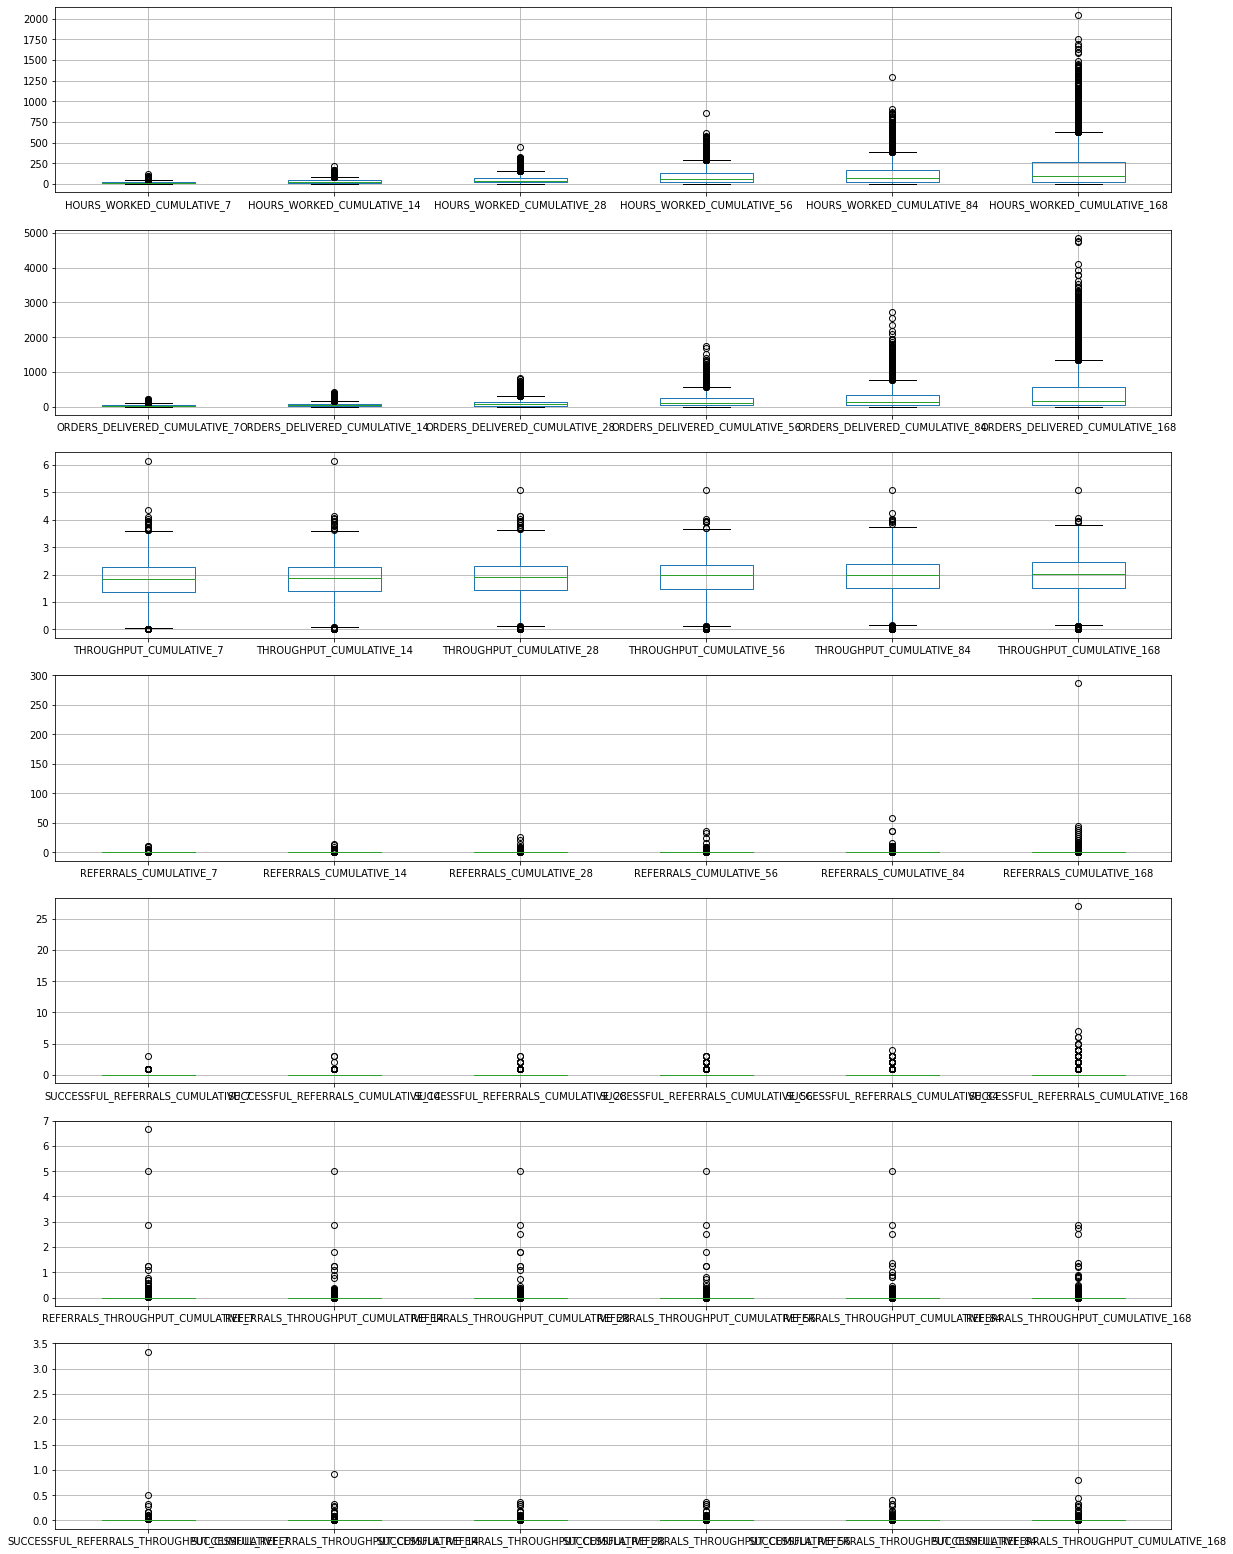

In [10]:
x = df_rolled.copy()
x = x[np.logical_or(x.VEHICLE_TYPE == 'Scooter / Motorcycle', x.VEHICLE_TYPE == 'Bicycle')]
_cols = ['HOURS_WORKED', 'ORDERS_DELIVERED', 'THROUGHPUT', 'REFERRALS', 'SUCCESSFUL_REFERRALS', 'REFERRALS_THROUGHPUT', 'SUCCESSFUL_REFERRALS_THROUGHPUT']
_, axs = plt.subplots(len(_cols), 1, figsize=(20, 4 * len(_cols)))
for _name, ax in zip(_cols, axs):
    x[[f'{_name}_CUMULATIVE_{d}' for d in days]].boxplot(ax=ax)

del _cols
plt.show()
plt.close()

Take away points:
1. Throughput is a much more stable quantity than hours worked or orders delivered, it is much less effected by large outliers (since it's a somewhat normalized quantity). From now on we won't even really use the hours worked or orders delivered.
2. Throughput has some fairly large outliers. e.g. some few people averaging > 4 deliveries per hour. We should check the vehicle type here and maybe normalize by that somehow.
3. Some person made > 250 referalls in 168 days. There are also many people making many referrals. --> how many of these lead to success?
4. Outliers in the successful referalls.
5. Outlier in the successfull referrals throughput


#### Vehicle Type ####

From above we noticed some weird outliers in the throughput. This leads me to investigate the VEHICLE_TYPEs

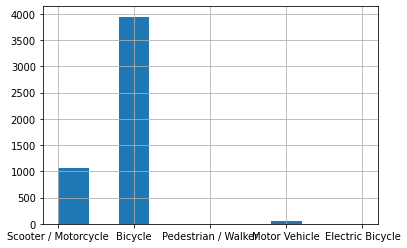

THROUGHPUT_CUMULATIVE_168                            \
                                         count      mean       std   min   
VEHICLE_TYPE                                                               
Bicycle                                 3946.0  1.891199  0.710110  0.00   
Electric Bicycle                           3.0  1.870000  0.668132  1.27   
Motor Vehicle                             44.0  2.057045  0.345318  1.42   
Pedestrian / Walker                        5.0  1.788000  0.900455  0.55   
Scooter / Motorcycle                    1067.0  2.183814  0.641022  0.00   

                                                
                        25%   50%    75%   max  
VEHICLE_TYPE                                    
Bicycle               1.460  1.98  2.390  5.07  
Electric Bicycle      1.510  1.75  2.170  2.59  
Motor Vehicle         1.815  2.08  2.305  2.75  
Pedestrian / Walker   1.670  1.81  1.820  3.09  
Scooter / Motorcycle  1.810  2.24  2.660  3.95

In [11]:
df_rolled['VEHICLE_TYPE'].hist()
plt.show()
plt.close()

df_rolled[['THROUGHPUT_CUMULATIVE_168', 'VEHICLE_TYPE']].groupby(["VEHICLE_TYPE"]).describe()

We can see that Electic Bicycle's & Walking make up ~= 0.1% of the vehicles, and have fairly different spreads, therefore we would like to remove these and keep only Bicycle's or Scooter/Motorcycle's. We check if these are correlated to `IS_RGR`

In [12]:
x = df_rolled.copy()
ct = pd.crosstab(index=x.VEHICLE_TYPE, columns=x.IS_RGR)
res = chi2, p, dof, ex = chi2_contingency(ct)
print(p)

1.6099332521559703e-83


`p` is almost 0 implying a large correlation, however intuition tells me that it's safe to drop those outlying vehicle types, since they also don't appear in the referral rewards program here:
https://riders.deliveroo.co.uk/en/refer

In [13]:
df_rolled = df_rolled[~df_rolled.VEHICLE_TYPE.isin(['Electric Bicycle', 'Pedestrian / Walker'])]

#### Outliers in throughput ####

First we see one point that has avg throughput > 5, the next largest has ~ 4.

In [14]:
x = df_rolled.copy()
x = x[['RIDER_ID', 'VEHICLE_TYPE', *[x for x in df_rolled.columns if 'THROUGHPUT' in x]]]
x['AVG_CUMULATIVE_THROUGHPUT'] = x[[x for x in df_rolled.columns if 'THROUGHPUT' in x]].mean(axis=1)
x = x[x.AVG_CUMULATIVE_THROUGHPUT > np.sort(x.AVG_CUMULATIVE_THROUGHPUT)[::-1][4]]
x

,RIDER_ID,VEHICLE_TYPE,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_168,REFERRALS_THROUGHPUT_CUMULATIVE_7,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_7,...,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_14,REFERRALS_THROUGHPUT_CUMULATIVE_28,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_28,REFERRALS_THROUGHPUT_CUMULATIVE_56,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56,REFERRALS_THROUGHPUT_CUMULATIVE_84,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,REFERRALS_THROUGHPUT_CUMULATIVE_168,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_168,AVG_CUMULATIVE_THROUGHPUT
13,33023,Bicycle,3.40,3.40,3.40,3.40,3.40,2.97,5.0,0.0,...,0.0,5.000000,0.0,5.000000,0.0,5.000000,0.0,0.845070,0.0,2.545282
896,69080,Bicycle,4.04,4.04,4.04,4.01,4.01,3.97,0.0,0.0,...,0.0,0.000000,0.0,0.833333,0.0,0.833333,0.0,0.769231,0.0,1.474772
2223,75733,Bicycle,6.15,6.15,5.07,5.07,5.07,5.07,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.810000
3278,82356,Bicycle,3.62,3.62,3.62,3.62,3.19,3.19,0.0,0.0,...,0.0,1.818182,0.0,1.818182,0.0,0.909091,0.0,0.909091,0.0,1.461919


In [15]:
df_rolled = df_rolled[df_rolled.THROUGHPUT_CUMULATIVE_168 < 5]

I also considered dropping data points that exist in the 90th percentile, but have made less than 5 deliveries.

In [16]:
df_rolled[np.logical_and(df_rolled.THROUGHPUT_CUMULATIVE_7 > df_rolled.THROUGHPUT_CUMULATIVE_168.quantile(0.90), df_rolled.ORDERS_DELIVERED_CUMULATIVE_168 < 5)]

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,IS_RGR,CHURNED_AFTER,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,...,REFERRALS_THROUGHPUT_CUMULATIVE_14,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_14,REFERRALS_THROUGHPUT_CUMULATIVE_28,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_28,REFERRALS_THROUGHPUT_CUMULATIVE_56,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56,REFERRALS_THROUGHPUT_CUMULATIVE_84,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,REFERRALS_THROUGHPUT_CUMULATIVE_168,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_168
26,48280,Roo York,2016-08-04,2016-08-12,2016-10-26,False,7.0,Digital,Bicycle,1.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.0
3593,85566,Roo York,2016-05-29,2017-07-26,2016-12-27,False,7.0,Organic,Bicycle,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


#### Outliers in referrals ####

There's one person who's made more than 1 referall per day for 6 months. This outlier is so large that it can be removed.

In [17]:
x = df_rolled[df_rolled.REFERRALS_CUMULATIVE_168 > 168].copy()
df_rolled = df_rolled[df_rolled.REFERRALS_CUMULATIVE_168 < 168]
x

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,IS_RGR,CHURNED_AFTER,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,...,REFERRALS_THROUGHPUT_CUMULATIVE_14,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_14,REFERRALS_THROUGHPUT_CUMULATIVE_28,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_28,REFERRALS_THROUGHPUT_CUMULATIVE_56,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56,REFERRALS_THROUGHPUT_CUMULATIVE_84,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,REFERRALS_THROUGHPUT_CUMULATIVE_168,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_168
632,67787,Roo York,2016-09-16,2016-10-20,2016-10-23,False,NaN,Digital,Bicycle,8.9,...,0.145985,0.0,0.29661,0.0,0.591133,0.049261,1.032028,0.035587,2.757956,0.260366


## Missing Values ##

#### Missing and inconsistent dates ####
There are many entries that have some combination of:
1. Missing APPLICATION_DATE
2. Missing APPLICATION_APPROVED_DATE
3. FIRST_WORK_DATE happening before APPLICATION_APPROVED_DATE

In [18]:
print(f"Missing APPLICATION_DATE'S = {df_rolled.APPLICATION_DATE.isna().sum()}")
print(f"Missing APPLICATION_APPROVED_DATE'S = {df_rolled.APPLICATION_APPROVED_DATE.isna().sum()}")
x = np.logical_and(df_rolled.APPLICATION_APPROVED_DATE < df_rolled.APPLICATION_DATE, np.logical_and(~df_rolled.APPLICATION_DATE.isna(), ~df_rolled.APPLICATION_APPROVED_DATE.isna())).sum()
print(f"APPLICATION_APPROVED_DATE < APPLICATION_DATE = {x}")

x = np.logical_and(df_rolled.FIRST_WORK_DATE < df_rolled.APPLICATION_DATE, np.logical_and(~df_rolled.APPLICATION_DATE.isna(), ~df_rolled.FIRST_WORK_DATE.isna())).sum()
print(f"FIRST_WORK_DATE < APPLICATION_DATE = {x}")

x = np.logical_and(df_rolled.FIRST_WORK_DATE < df_rolled.APPLICATION_APPROVED_DATE, np.logical_and(~df_rolled.APPLICATION_APPROVED_DATE.isna(), ~df_rolled.FIRST_WORK_DATE.isna())).sum()
print(f"FIRST_WORK_DATE < APPLICATION_APPROVED_DATE = {x}")

Missing APPLICATION_DATE'S = 57
Missing APPLICATION_APPROVED_DATE'S = 50
APPLICATION_APPROVED_DATE < APPLICATION_DATE = 0
FIRST_WORK_DATE < APPLICATION_DATE = 0
FIRST_WORK_DATE < APPLICATION_APPROVED_DATE = 164


We plot the two problematic dates

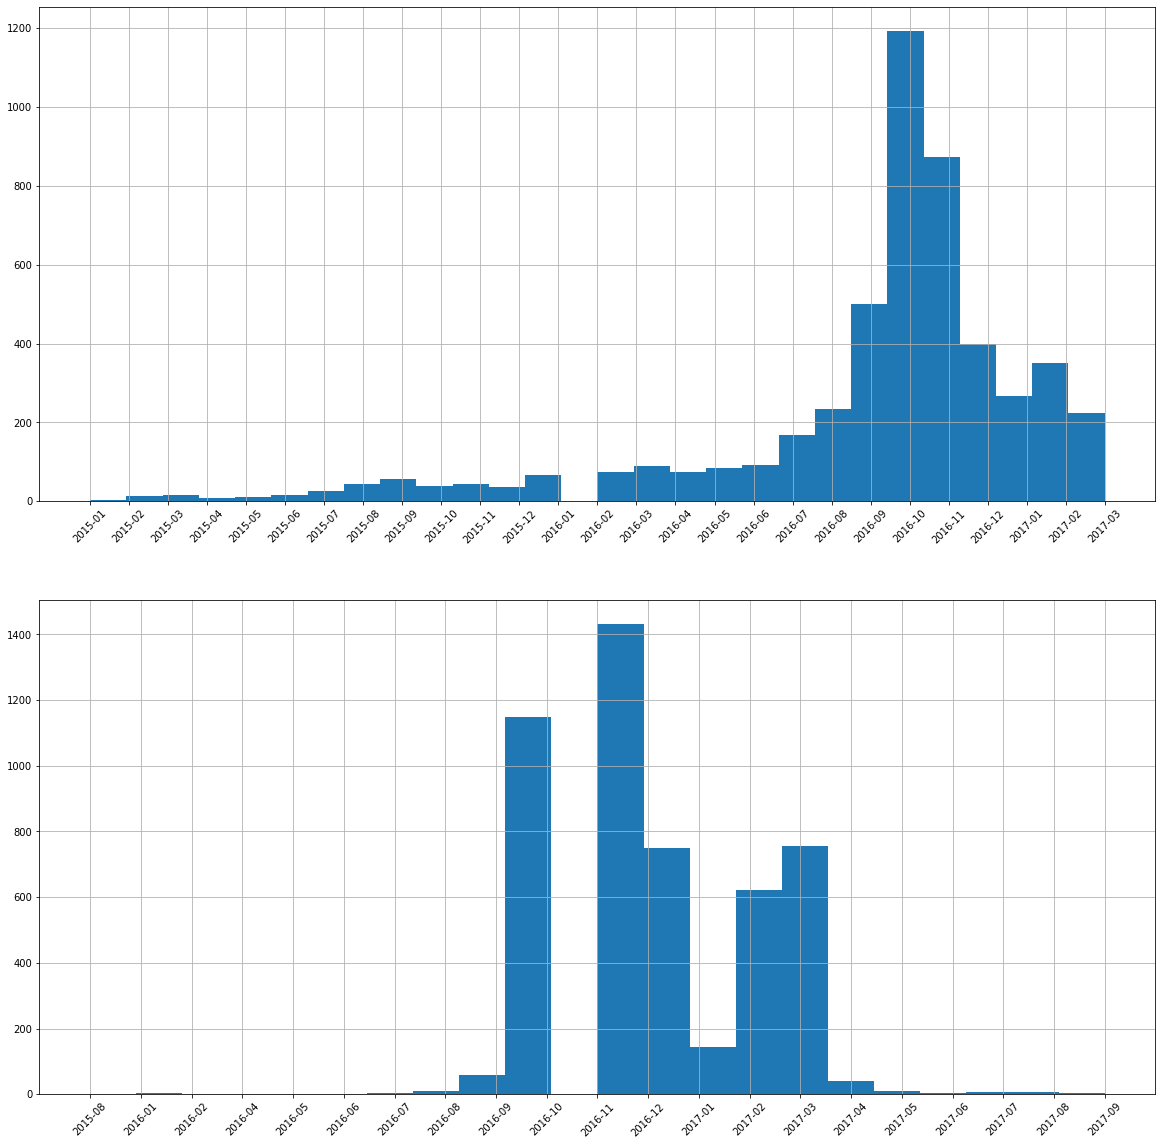

In [19]:
x = df_rolled.copy()
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
date_cols = ['APPLICATION_DATE', 'APPLICATION_APPROVED_DATE']
for col, ax in zip(date_cols, axs.flatten()):
    h = x[col].dt.strftime('%Y-%m')
    h = h.sort_values()
    h.hist(bins=len(h.unique()), ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
plt.show()
plt.close()

We can see some pretty obvious glares in the data. There is a large gap in values values for 2016-01 APPLICATION DATE wich looks out-of-place. Furthermore  2016-10 APPLICATION_APPROVED_DATE has 0 values which also looks out-of-place.

We also see some small gaps in APPLICATION_DATE 2026-12 and APPLICATION_APPROVED_DATE 2017-01, this does not worry me because Christmas probably has a large effect on these numbers.

We don't want to drop these nan's since we hypothesis that they probably belong to these empty bins in the above plot. We are therefore going to impute the above.


I will impute the missing or inconsistent `APPLICATION_APPROVED_DATE` using
```
APPLICATION_APPROVED_DATE = FIRST_WORK_DATE - median(FIRST_WORK_DATE - APPLICATION_APPROVED_DATE)

APPLICATION_DATE = APPLICATION_APPROVED_DATE - median(APPLICATION_APPROVED_DATE - APPLICATION_DATE)
```

FIRST_WORK_DATE - APPLICATION_APPROVED_DATE median difference 2 days 00:00:00
APPLICATION_APPROVED_DATE - APPLICATION_DATE median difference 25 days 00:00:00


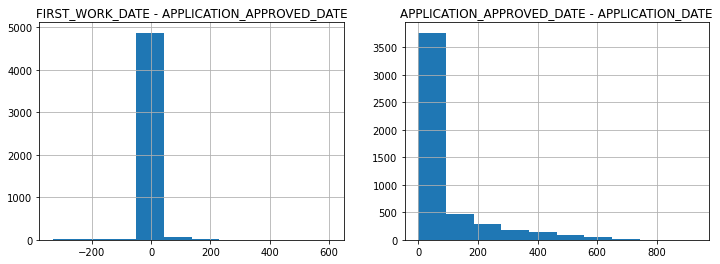

In [20]:
first_work_application_approved_diff = (df_rolled.FIRST_WORK_DATE - df_rolled.APPLICATION_APPROVED_DATE).median()
application_application_approved_diff = (df_rolled.APPLICATION_APPROVED_DATE - df_rolled.APPLICATION_DATE).median()
print('FIRST_WORK_DATE - APPLICATION_APPROVED_DATE median difference', first_work_application_approved_diff)

x = df_rolled.copy()
x['DAY_DIFF'] = (df_rolled.FIRST_WORK_DATE - df_rolled.APPLICATION_APPROVED_DATE) / pd.to_timedelta(1, unit='days')
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
x.DAY_DIFF.hist(ax=ax1)
ax1.set_title('FIRST_WORK_DATE - APPLICATION_APPROVED_DATE')

print('APPLICATION_APPROVED_DATE - APPLICATION_DATE median difference', application_application_approved_diff)
x['DAY_DIFF'] = (df_rolled.APPLICATION_APPROVED_DATE - df_rolled.APPLICATION_DATE) / pd.to_timedelta(1, unit='days')
x.DAY_DIFF.hist(ax=ax2)
ax2.set_title('APPLICATION_APPROVED_DATE - APPLICATION_DATE')
plt.show()
plt.close()

Below we perform the imputation, we replot the same figures from above

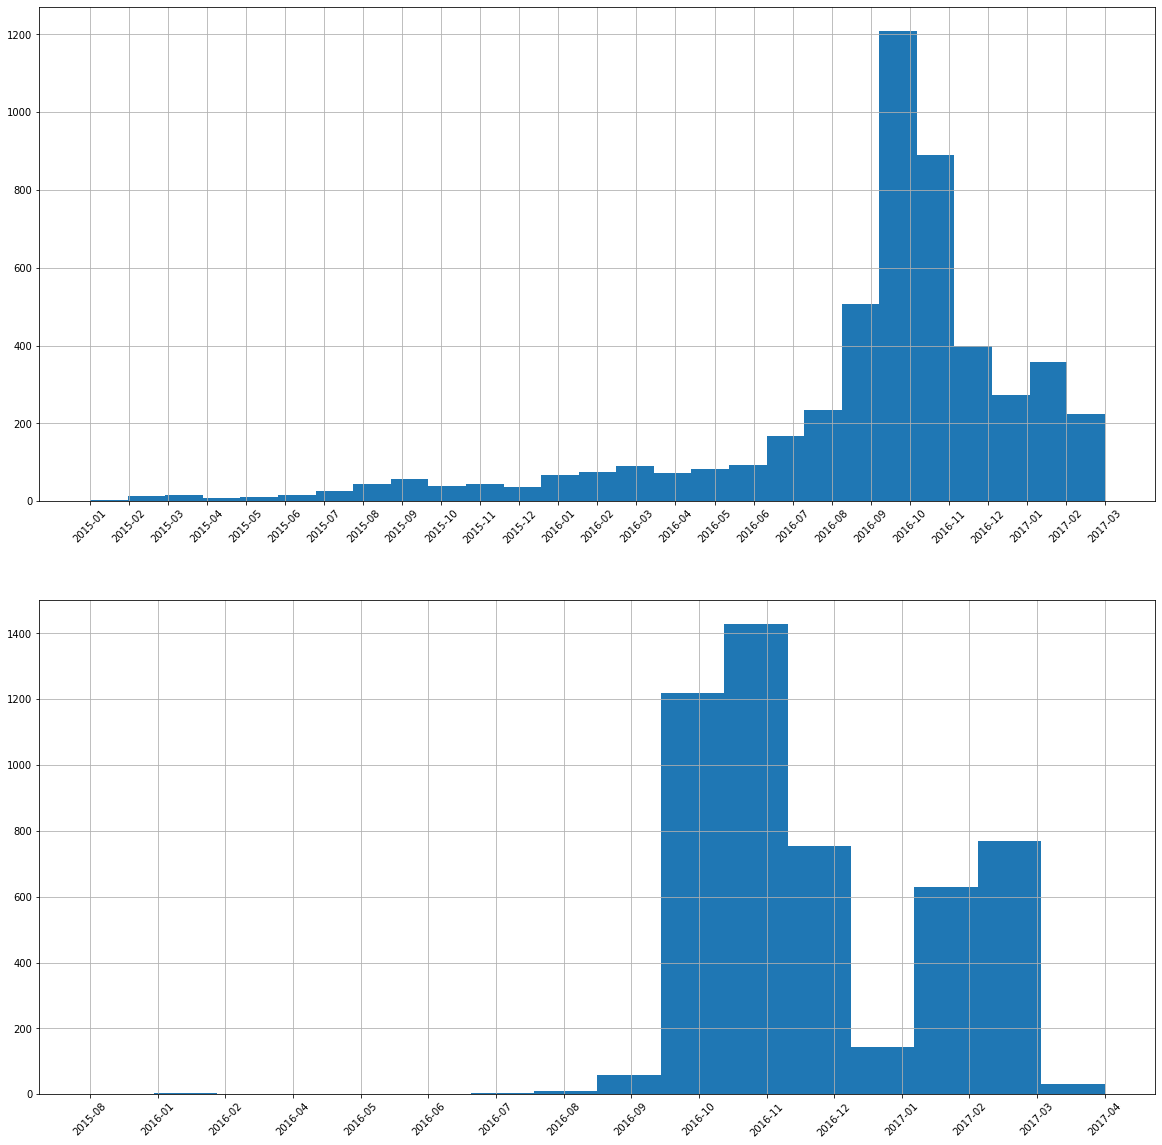

In [21]:
def impute_application_approved_date(application_approved_date, first_work_date):
    if pd.isna(application_approved_date) or first_work_date < application_approved_date:
        return first_work_date - first_work_application_approved_diff
    return application_approved_date


def impute_application_date(application_date, application_approved_date):
    if pd.isna(application_date):
        return application_approved_date - application_application_approved_diff
    return application_date


x = df_rolled.copy()
x.APPLICATION_APPROVED_DATE = x.apply(lambda a: impute_application_approved_date(a.APPLICATION_APPROVED_DATE, a.FIRST_WORK_DATE), axis=1)
x.APPLICATION_DATE = x.apply(lambda a: impute_application_date(a.APPLICATION_DATE, a.APPLICATION_APPROVED_DATE), axis=1)

fig, axs = plt.subplots(2, 1, figsize=(20, 20))
date_cols = ['APPLICATION_DATE', 'APPLICATION_APPROVED_DATE']
for col, ax in zip(date_cols, axs.flatten()):
    h = x[col].dt.strftime('%Y-%m')
    h = h.sort_values()
    h.hist(bins=len(h.unique()), ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()
plt.close()

df_rolled = x

We can see that this seems to have done a pretty good job. The huge amount of missing values for 2016-01 & 2016-10 in the APPLICATION_DATE and APPLICATION_APPROVED_DATE, respectively have been filled and the spread of values over the months looks more sensible.

# Metrics #
We want to keep this fairly simple. There are 4 categories to focus on. (THIS IS MY CONTENTS PAGE)
- Acquisition: How many customers are we acquiring?
- Engagement: How many daily active users do we have?
- Retention: How long does it take before a customer churns?
- Revenue: How much money are we making?
We want to compare these between channels e.g. "organic has less churn than other channels, because riders are more motivated".


## Acuisition ##

This is about acquiring new riders via referrals
1. Percentage of riders who have come through the referral scheme
2. Percentage referrals that are successful

Below is a histogram of the applications who applied, stacked by Referral vs Other from 1st Jan 2016 to 31st March 2017. We exclude data < 2015 since there are not many data points in this area.

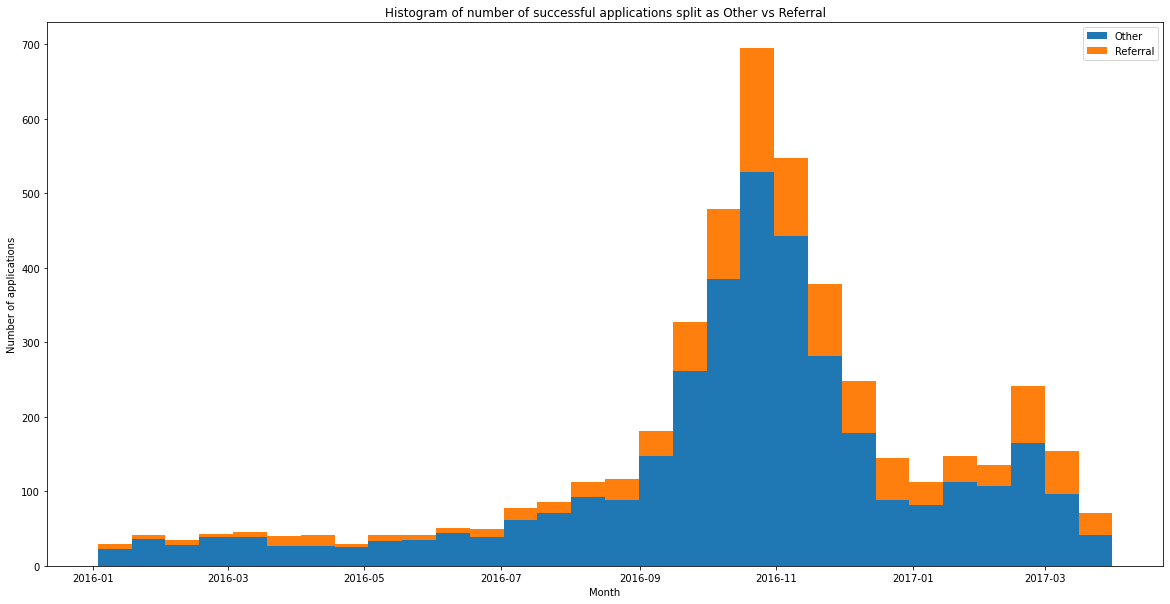

In [22]:
x = df_rolled.copy()
x = x[x.APPLICATION_DATE > '2016-01-01']
x.ACQUISITION_CHANNEL = x.ACQUISITION_CHANNEL.apply(lambda x: 'Referral' if x == 'Referral' else 'Other')
ad = x.pivot(columns='ACQUISITION_CHANNEL').APPLICATION_DATE
_ = plt.figure(figsize=(20, 10), facecolor='white')
values, labels = zip(*[(ad[c].dropna(), c) for c in ad.columns])
plt.hist(
    values,
    stacked=True,
    bins=2*len(x.APPLICATION_DATE.dt.to_period('M').unique()),
    label=labels
)
plt.title('Histogram of number of successful applications split as Other vs Referral')
plt.xlabel("Month")
plt.ylabel("Number of applications")
plt.legend()
plt.savefig('hist_num_apps.png')
plt.show()
plt.close()

Below is a plot of the overall percentage of riders applying under the referral scheme:

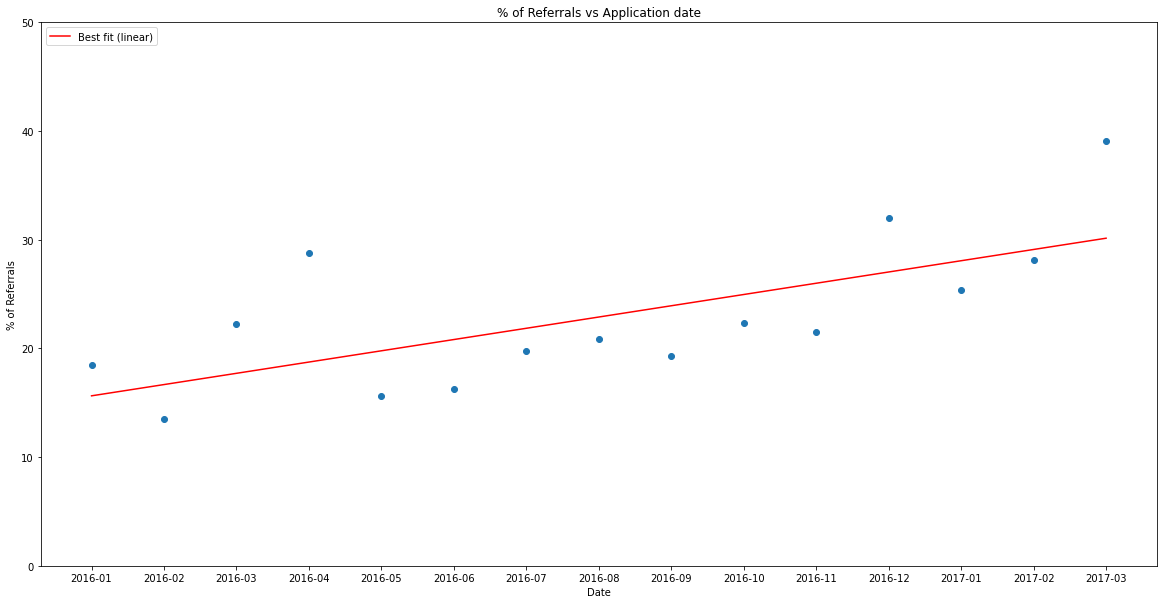

In [23]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf

_ = plt.figure(figsize=(20, 10), facecolor='white')
x = df_rolled.copy()
x = x[x.APPLICATION_DATE > '2016-01-01']
x.APPLICATION_DATE = x.APPLICATION_DATE.dt.strftime('%Y-%m')
h = x[x.IS_RGR].groupby(['APPLICATION_DATE']).RIDER_ID.count() / x.groupby(['APPLICATION_DATE']).RIDER_ID.count()

inds = np.array([i for i in range(len(h))])
X = sm.add_constant(inds)
model = sm.OLS(h, X).fit()
intercept, slope = model.params

# print(model.summary())
plt.plot(h.index, 100*(intercept + slope * inds), label='Best fit (linear)', color='red')
plt.scatter(x=h.index, y=h*100)
plt.legend(loc='upper left')
plt.title("% of Referrals vs Application date")
plt.ylabel("% of Referrals")
plt.xlabel("Date")
plt.ylim((0, 50))
plt.show()
plt.close()

Perhaps another interesting stat is the total percentage of referrals made that are successful.

In [24]:
df_rolled.SUCCESSFUL_REFERRALS_CUMULATIVE_168.sum() / df_rolled.REFERRALS_CUMULATIVE_168.sum()

0.2283909574468085

## Engagement ##

Two aspects here:
The first is about is how engaged are current riders in using the scheme. For this a useful metric is just:
1. Amount of referrals and successful referrals made by riders after some time

The second aspect is how engaged referred riders are compared to other acquisition channels
1. Number of times referral generated a fee for their referee
2. Hours worked by referrals

In [25]:
df_rolled.REFERRALS_CUMULATIVE_168.describe()

count    5055.000000
mean        0.595054
std         1.911790
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        45.000000
Name: REFERRALS_CUMULATIVE_168, dtype: float64

In [26]:
df_rolled.groupby('IS_RGR').REFERRALS_CUMULATIVE_168.describe()

,count,mean,std,min,25%,50%,75%,max
IS_RGR,,,,,,,,
False,3841.0,0.473054,1.660624,0.0,0.0,0.0,0.0,41.0
True,1214.0,0.981054,2.510418,0.0,0.0,0.0,1.0,45.0


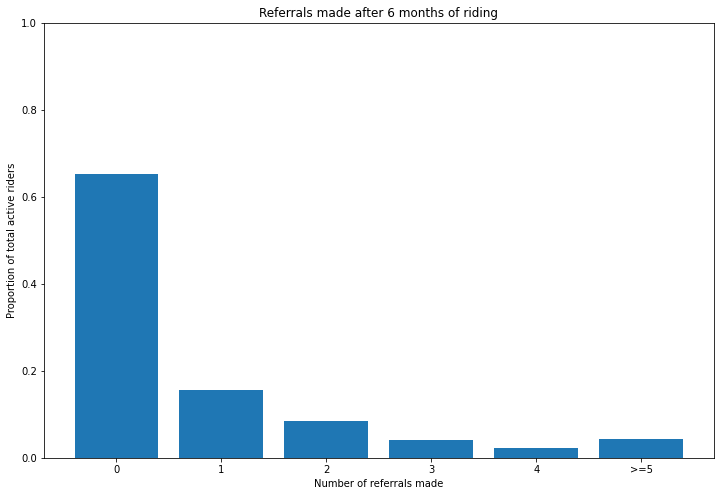

In [27]:
x = df_rolled.copy()
x = x[df_rolled.CHURNED_AFTER.isna()]  # Only inlcude non-churned ones
x = x.REFERRALS_CUMULATIVE_168

counts = []
labels = []
m = 5
for i in range(m):
    counts.append(x[x==i].count() / len(x))
    labels.append(str(i))

counts.append(x[x>=m].count() / len(x))
labels.append(f'>={m}')

plt.figure(figsize=(12, 8), facecolor='white')
plt.bar(labels, np.array(counts))
plt.title("Referrals made after 6 months of riding")
plt.xlabel("Number of referrals made")
plt.ylabel("Proportion of total active riders")
plt.ylim((0, 1.0))
plt.show()
plt.close()

We can see, that even after 6 months of being at the company ~60% of them have made 0 referrals.

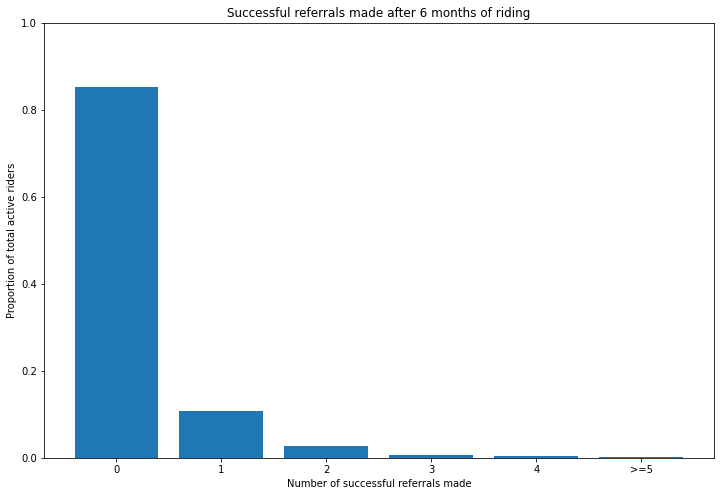

In [28]:
x = df_rolled[df_rolled.CHURNED_AFTER.isna()]  # Only inlcude non-churned ones
x = x.SUCCESSFUL_REFERRALS_CUMULATIVE_168.copy()
counts = []
labels = []
m = 5
for i in range(m):
    counts.append(x[x==i].count() / len(x))
    labels.append(str(i))

counts.append(x[x>=m].count() / len(x))
labels.append(f'>={m}')

plt.figure(figsize=(12, 8), facecolor='white')
plt.bar(labels, counts)
plt.title("Successful referrals made after 6 months of riding")
plt.xlabel("Number of successful referrals made")
plt.ylabel("Proportion of total active riders")
plt.ylim((0, 1.0))
plt.show()
plt.close()

In [29]:
x = df_rolled.copy()
x = x[x.CHURNED == 0]
# x = x[x.REFERRALS_CUMULATIVE_168 < 1]
# x.groupby('LOCATION').REFERRALS_CUMULATIVE_168.sum() / x.groupby('LOCATION').REFERRALS_CUMULATIVE_168.count()
x[x.REFERRALS_CUMULATIVE_168 < 1].groupby('LOCATION').REFERRALS_CUMULATIVE_168.count() / x.groupby('LOCATION').REFERRALS_CUMULATIVE_168.count()

LOCATION
Roo Town          0.847162
Roo York          0.574063
Roo de Janeiro    0.743875
Name: REFERRALS_CUMULATIVE_168, dtype: float64

Again, ~80% of still active riders have made 0 successful referrals after 6 months of riding.

In [99]:
df_rolled.groupby('IS_RGR').count() / df_rolled.count()

,ACQUISITION_CHANNEL,APPLICATION_APPROVED_DATE,APPLICATION_DATE,CHURNED,CHURNED_AFTER,FIRST_WORK_DATE,HOURS_WORKED_CUMULATIVE_14,HOURS_WORKED_CUMULATIVE_168,HOURS_WORKED_CUMULATIVE_28,HOURS_WORKED_CUMULATIVE_56,...,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_7,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,THROUGHPUT_CUMULATIVE_14,THROUGHPUT_CUMULATIVE_168,THROUGHPUT_CUMULATIVE_28,THROUGHPUT_CUMULATIVE_56,THROUGHPUT_CUMULATIVE_7,THROUGHPUT_CUMULATIVE_84,VEHICLE_TYPE
IS_RGR,,,,,,,,,,,,,,,,,,,,,
False,0.759842,0.759842,0.759842,0.759842,0.777053,0.759842,0.759842,0.759842,0.759842,0.759842,...,0.759842,0.759842,0.759842,0.759842,0.759842,0.759842,0.759842,0.759842,0.759842,0.759842
True,0.240158,0.240158,0.240158,0.240158,0.222947,0.240158,0.240158,0.240158,0.240158,0.240158,...,0.240158,0.240158,0.240158,0.240158,0.240158,0.240158,0.240158,0.240158,0.240158,0.240158


In [97]:
x = df_rolled.copy()
x.groupby(['IS_RGR', 'LOCATION']).REFERRALS_CUMULATIVE_168.mean()

IS_RGR  LOCATION      
False   Roo Town          0.250847
        Roo York          0.538253
        Roo de Janeiro    0.414361
True    Roo Town          0.357143
        Roo York          0.956014
        Roo de Janeiro    1.406977
Name: REFERRALS_CUMULATIVE_168, dtype: float64

Unsurprisingly, referrals themselves tend to make more referrals

Below we investigate how many people who were referred actually generated a fee for their referee. Payout's are taken from here: https://riders.deliveroo.co.uk/en/refer

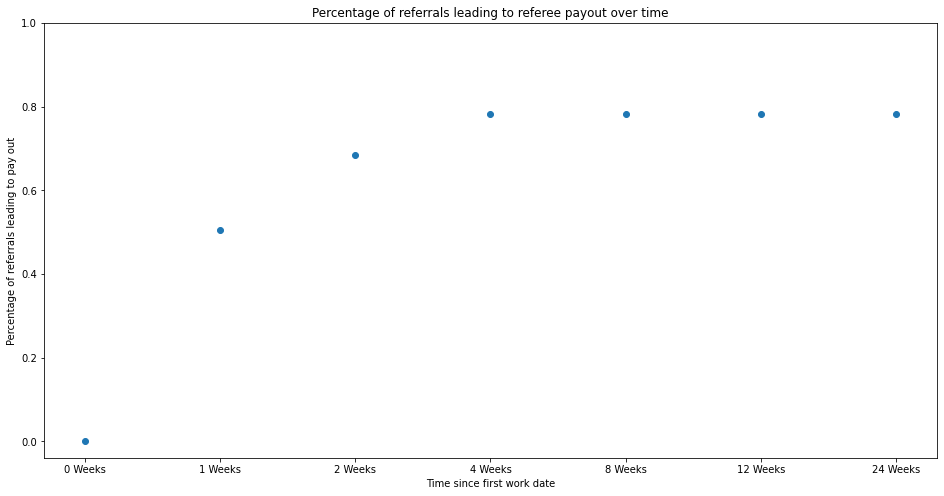

In [30]:
def generated_referral_fee(deliveries_made: int, is_rgr: bool, orders_made_after_28_days: int) -> bool:
    return (is_rgr and deliveries_made >= 30 and orders_made_after_28_days >= 30)
    

y = [0]
x = df_rolled[df_rolled.IS_RGR == True].copy()
for day in days:
    x[f'REFERRAL_FEE_PAID_OUT_{day}'] = x.apply(
        lambda q: generated_referral_fee(
            q[f'ORDERS_DELIVERED_CUMULATIVE_{day}'],
            q['IS_RGR'],
            q[f'ORDERS_DELIVERED_CUMULATIVE_28']
        ), axis=1
    )
    y.append(x[f'REFERRAL_FEE_PAID_OUT_{day}'].sum() / x[f'REFERRAL_FEE_PAID_OUT_{day}'].count())

_ = plt.figure(figsize=(16, 8), facecolor='white')
plt.scatter(x=[i for i in range(len(days) + 1)], y=y)
plt.xticks([i for i in range(len(days) + 1)], labels=[f"{int(day/7)} Weeks" for day in [0] + days.tolist()])
plt.ylim((min(plt.ylim()), 1.0))
plt.xlabel('Time since first work date')
plt.ylabel("Percentage of referrals leading to pay out")
plt.title("Percentage of referrals leading to referee payout over time")
plt.show()
plt.close()

We can see that referred riders actually have ~80% chance of generating a referral payout (i.e. they make 30 or more orders) for their referee after 4 weeks, this is a potential thing we can stress to people to encourage them to use the scheme.

Below we show that referrals actually tend to have a higher amoutn of working hours.

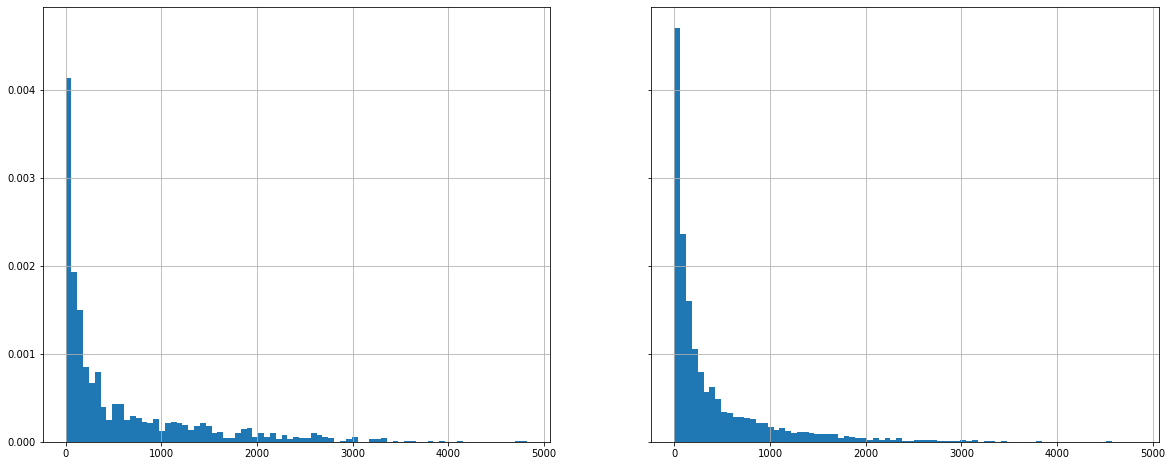

In [31]:
x = df_rolled.copy()
z = x.ORDERS_DELIVERED_CUMULATIVE_168
iqr = z.quantile(0.75) - z.quantile(0.25)
bw = 2 * iqr / (len(x) ** (1/3))
bins = z.max() / bw
bins = int(np.round(bins))
bins = np.arange(bins) * bw
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True, facecolor='white')
x[x.IS_RGR].ORDERS_DELIVERED_CUMULATIVE_168.hist(bins=bins, ax=ax1, density=True)
x[~x.IS_RGR].ORDERS_DELIVERED_CUMULATIVE_168.hist(bins=bins, ax=ax2, density=True)
plt.show()
plt.close()

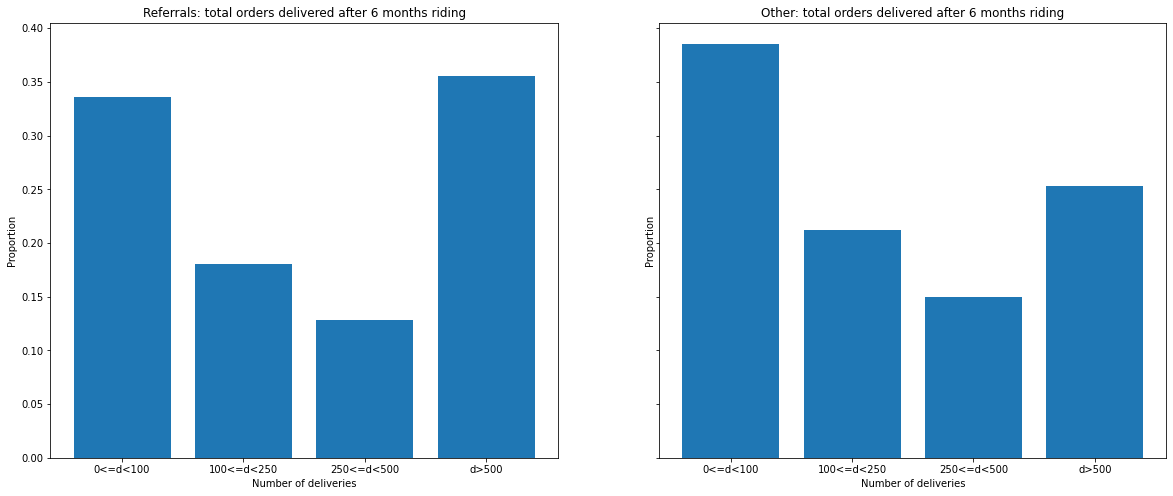

In [32]:
x = df_rolled.copy()
z = x.ORDERS_DELIVERED_CUMULATIVE_168
bins = [0, 100, 250, 500, int(z.max() + 1)]
rgr, not_rgr, labels = [], [], []
for i in range(len(bins) - 1):
    bin_max = bins[i + 1]
    bin_min = bins[i]
    q = x[np.logical_and(z < bin_max, z >= bin_min)]
    not_rgr.append(q[~q.IS_RGR].RIDER_ID.count() / x[~x.IS_RGR].RIDER_ID.count())
    rgr.append(q[q.IS_RGR].RIDER_ID.count() / x[x.IS_RGR].RIDER_ID.count())
    labels.append(f"{bin_min}<=d<{bin_max}")

labels[-1] = f"d>{bins[-2]}"
# assert sum(not_rgr) == 1  #len(x[~x.IS_RGR])
# assert sum(rgr) == len(x[x.IS_RGR])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True,  facecolor='white')
ax1.bar(labels, rgr)
ax2.bar(labels, not_rgr)
ax1.set_title('Referrals: total orders delivered after 6 months riding')
ax2.set_title('Other: total orders delivered after 6 months riding')
ax1.set_xlabel("Number of deliveries")
ax2.set_xlabel("Number of deliveries")
ax1.set_ylabel("Proportion")
ax2.set_ylabel("Proportion")
plt.show()
plt.close()

## Retention ##

1. Proportion of people still active after 6 months
2. Retention time - do referred people stick around more or less than others?

In [33]:
df_rolled.groupby('ACQUISITION_CHANNEL').CHURNED.describe()

,count,mean,std,min,25%,50%,75%,max
ACQUISITION_CHANNEL,,,,,,,,
Digital,750.0,0.562667,0.496388,0.0,0.0,1.0,1.0,1.0
Job Platforms,67.0,0.522388,0.503268,0.0,0.0,1.0,1.0,1.0
Offline,296.0,0.476351,0.500286,0.0,0.0,0.0,1.0,1.0
Organic,2728.0,0.436217,0.496006,0.0,0.0,0.0,1.0,1.0
Referral,1214.0,0.422570,0.494172,0.0,0.0,0.0,1.0,1.0


Between acuisition channels there is not much different in those stats. Note that this only includes people who stopped posting new hours between day 168 and 84.

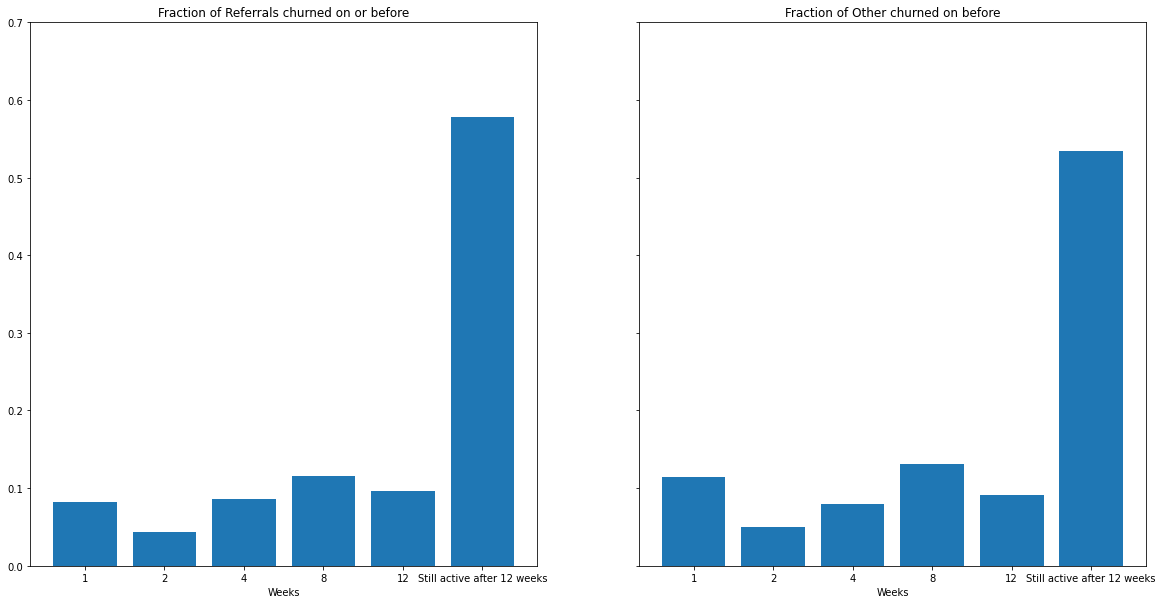

In [34]:
x = df_rolled.copy()
z = x.CHURNED_AFTER
bins = days
rgr, not_rgr, labels = [], [], []
for day in days[:-1]:
    q = x[z == day]
    not_rgr.append(q[~q.IS_RGR].RIDER_ID.count() / x[~x.IS_RGR].RIDER_ID.count())
    rgr.append(q[q.IS_RGR].RIDER_ID.count() / x[x.IS_RGR].RIDER_ID.count())
    labels.append(f"{int(day/7)}")

q = x[z.isna()]
not_rgr.append(q[~q.IS_RGR].RIDER_ID.count() / x[~x.IS_RGR].RIDER_ID.count())
rgr.append(q[q.IS_RGR].RIDER_ID.count() / x[x.IS_RGR].RIDER_ID.count())
labels.append("Still active after 12 weeks")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True, facecolor='white')
ax1.bar(labels, rgr)
ax2.bar(labels, not_rgr)
ax1.set_title('Fraction of Referrals churned on or before')
ax1.set_xlabel("Weeks")
ax2.set_xlabel("Weeks")
ax2.set_title('Fraction of Other churned on before')
plt.ylim((0, 0.7))
plt.show()
plt.close()

This plot supports the fact that a referral is ~ as likely to churn in weeks 2 through 12. However They are slightly more likely to still be around after 12 weeks.

In [35]:
df_rolled.groupby(['ACQUISITION_CHANNEL', 'CHURNED']).RIDER_ID.count()

ACQUISITION_CHANNEL  CHURNED
Digital              0           328
                     1           422
Job Platforms        0            32
                     1            35
Offline              0           155
                     1           141
Organic              0          1538
                     1          1190
Referral             0           701
                     1           513
Name: RIDER_ID, dtype: int64

In [36]:
print(2053 / (2053 + 1788))
print(701 / (701 + 513))
print(1538/(1538+1190))

0.5344962249414215
0.5774299835255354
0.5637829912023461


## Revenue ##
1. Average throughput per rider
2. Average profit made per rider



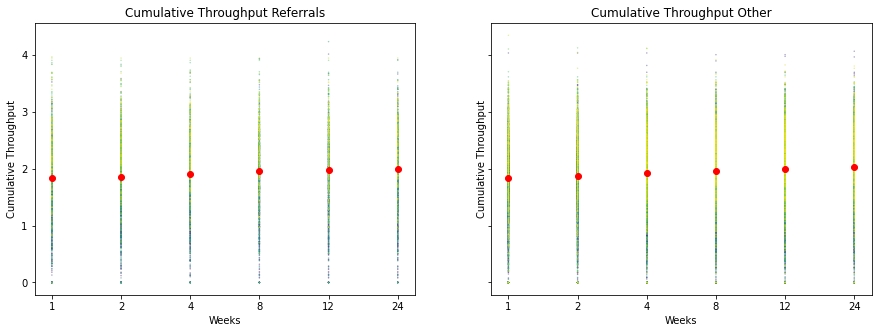

In [37]:
x = df_rolled.copy()  # .sample(20)
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
_df_r = x[x.IS_RGR]
_df_n = x[~x.IS_RGR]
for i, day in enumerate(days):
    ax1.scatter([i for _ in range(len(_df_r))], _df_r[f'THROUGHPUT_CUMULATIVE_{day}'], c=list(range(len(_df_r))), alpha=0.5, s=0.2)
    ax1.scatter(i, _df_r[f'THROUGHPUT_CUMULATIVE_{day}'].median(), c='red')
    ax2.scatter([i for _ in range(len(_df_n))], _df_n[f'THROUGHPUT_CUMULATIVE_{day}'], c=list(range(len(_df_n))), alpha=0.5, s=0.2)
    ax2.scatter(i, _df_n[f'THROUGHPUT_CUMULATIVE_{day}'].median(), c='red')

ax1.set_title("Cumulative Throughput Referrals")
ax2.set_title("Cumulative Throughput Other")
ax1.set_ylabel("Cumulative Throughput")
ax2.set_ylabel("Cumulative Throughput")
ax1.set_xlabel("Weeks")
ax2.set_xlabel("Weeks")
ax1.set_xticks([i for i in range(len(days))])
ax1.set_xticklabels([f"{int(day/7)}" for day in days])
ax2.set_xticks([i for i in range(len(days))])
ax2.set_xticklabels([f"{int(day/7)}" for day in days])

plt.show()
plt.close()

In [110]:
df_rolled.LOCATION.unique()

array(['Roo York', 'Roo de Janeiro', 'Roo Town'], dtype=object)

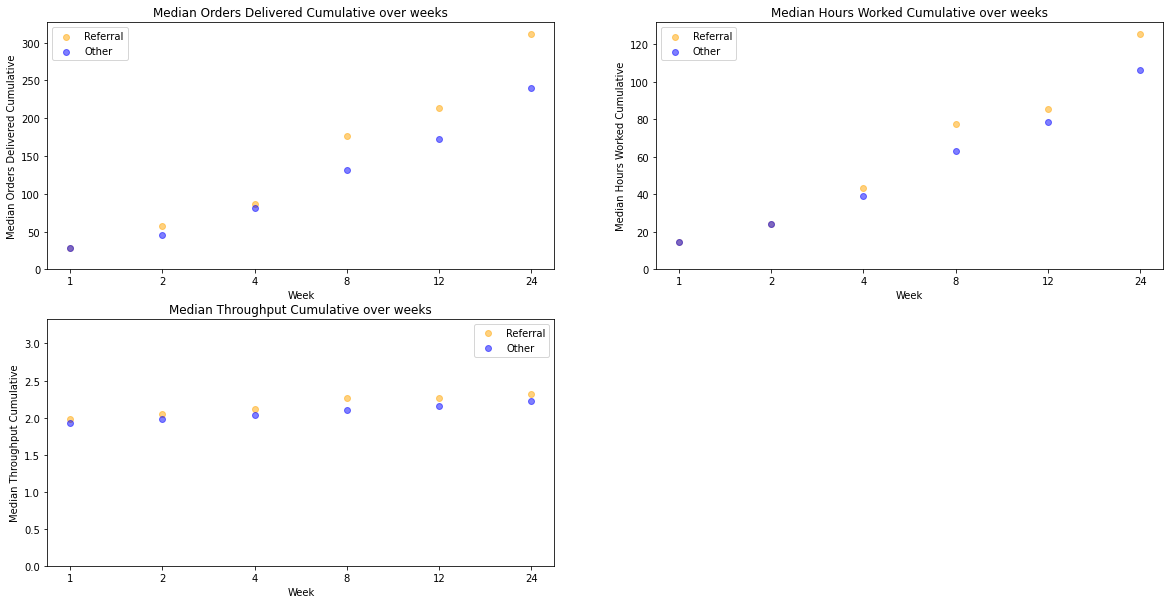

In [111]:
x = df_rolled.copy()  # .sample(20)
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x = x[x.LOCATION == 'Roo de Janeiro']
_df_r = x[x.IS_RGR]
_df_n = x[~x.IS_RGR]
cols = ['ORDERS_DELIVERED_CUMULATIVE', 'HOURS_WORKED_CUMULATIVE', 'THROUGHPUT_CUMULATIVE']
_, axs = plt.subplots(2, 2, figsize=(20, 10), facecolor='white')
for name, ax in zip(cols, axs.flatten()):
    rgr_avg, not_rgr_avg, labels = [], [], []
    for i, day in enumerate(days):
        col = f'{name}_{day}'
        rgr_avg.append(_df_r[col].median())
        not_rgr_avg.append(_df_n[col].median())
        labels.append(f"{int(day/7)}")

    ax.scatter(labels, rgr_avg, c='orange', alpha=0.5, label='Referral')
    ax.scatter(labels, not_rgr_avg, c='blue', alpha=0.5, label='Other')
    ax.set_xlabel('Week')
    ax.legend()
    ax.set_ylabel(f"Median {name.title().replace('_', ' ')}")
    ax.set_title(f'Median {name.title().replace("_", " ")} over weeks')
    ax.set_ylim((0, ax.get_ylim()[1]+ 1))

axs[1][1].set_axis_off()
plt.show()
plt.close()

The above does a nice job at demonstrating that, in general, referrals tend to work for more hours and deliver more orders. However the last plot shows that their throughput (i.e. delieveries / hour) remains the same as non-referrals (expected since being referred doesn't make them cycle any faster :)). Note that there are no error bars shown here, only the median, but it does do a decent job at showing the general trend.

However this analysis does not take into account the referral fee. Let's estimate the impact of that

#### Estimaiting profit made ####

We compute profit made, if every delivery is worth the average price. According to the following article: https://www.thegrocer.co.uk/fundraising/deliveroo-is-it-really-worth-88bn/654624.article the average order value is around £20, and Deliveroo makes £2.07 gross profit per order, HSBC Global Research calculates, though it is difficult to be precise. I am assuming that this value has not already been adjusted for the referral fees.

I am taking the referral fees from here: https://riders.deliveroo.co.uk/en/refer

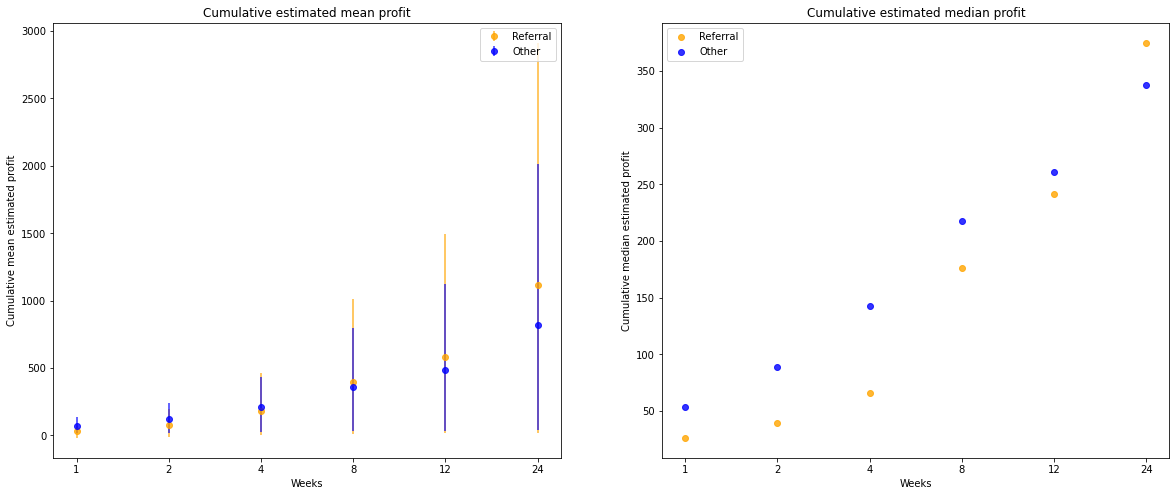

In [39]:
def referral_fee(orders_made: int, vehicle: str, is_rgr: bool, orders_after_28_days: int) -> int:
    """Get the referral fee."""
    if not is_rgr or orders_made < 30 or orders_after_28_days < 30:
        return 0
    
    if vehicle == 'Scooter / Motorcycle' or vehicle == 'Bicycle':
        return 100
    elif vehicle == 'Motor Vehicle':
        return 50
    raise ValueError(f"Unknown vehicle {vehicle}")
    

def profit_made(
    orders_made: int,
    vehicle: str,
    is_rgr: bool,
    orders_after_28_days: int,
    average_delivery_profit: float = 2.07
):
    """Estimate the profit made from a rider."""
    fee = referral_fee(orders_made, vehicle, is_rgr=is_rgr, orders_after_28_days=orders_after_28_days)
    profit = average_delivery_profit * orders_made - fee
    return profit
    
x = df_rolled.copy()
for day in days:
    x[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'] = x.apply(
        lambda q: profit_made(
            q[f'ORDERS_DELIVERED_CUMULATIVE_{day}'],
            q['VEHICLE_TYPE'],
            q['IS_RGR'],
            q[f'ORDERS_DELIVERED_CUMULATIVE_28']
        ), axis=1)

x = x[['RIDER_ID', 'IS_RGR', *[f'ESTIMATED_PROFIT_CUMULATIVE_{day}' for day in days], *[f'ORDERS_DELIVERED_CUMULATIVE_{day}' for day in days]]]


_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=False, facecolor='white')
_df_r, _df_n = x[x.IS_RGR], x[~x.IS_RGR]
y1, y2, y1errup, y1errdown, y2errup, y2errdown, y1med, y2med = [], [], [], [], [], [], [], []
quantile = 0.75
quantile_up = (1 + quantile) / 2
quantile_down = (1 - quantile) / 2
for day in days:
    y = _df_r[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].mean()
    y1.append(y)
    y1med.append(_df_r[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].median())
    y1errup.append(_df_r[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].quantile(quantile_up) - y)
    y1errdown.append(y - _df_r[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].quantile(quantile_down))

    y = _df_n[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].mean()
    y2.append(y)
    y2med.append(_df_n[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].median())
    y2errup.append(_df_n[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].quantile(quantile_up) - y)
    y2errdown.append(y - _df_n[f'ESTIMATED_PROFIT_CUMULATIVE_{day}'].quantile(quantile_down))
    

xx = [i for i in range(len(days))]
ax1.errorbar(xx, y1, yerr=(y1errdown, y1errup), label='Referral', fmt="o", alpha=0.8, color='orange')
ax1.errorbar(xx, y2, yerr=(y2errdown, y2errup), label='Other', fmt="o", alpha=0.8, color='blue')
ax2.scatter(xx, y1med, label='Referral', alpha=0.8, color='orange')
ax2.scatter(xx, y2med, label='Other', alpha=0.8, color='blue')
ax1.set_xticks(xx)
ax1.set_xticklabels([f"{int(day/7)}" for day in days])
ax2.set_xticks(xx)
ax2.set_xticklabels([f"{int(day/7)}" for day in days])
ax1.set_title("Cumulative estimated mean profit")
ax2.set_title("Cumulative estimated median profit")
ax1.set_ylabel("Cumulative mean estimated profit")
ax2.set_ylabel("Cumulative median estimated profit")
ax1.set_xlabel("Weeks")
ax2.set_xlabel("Weeks")
ax1.legend()
ax2.legend()

plt.show()
plt.close()

In [40]:
x.groupby('IS_RGR').ESTIMATED_PROFIT_CUMULATIVE_168.sum()

IS_RGR
False    3154234.95
True     1353125.67
Name: ESTIMATED_PROFIT_CUMULATIVE_168, dtype: float64

In [41]:
df_rolled[df_rolled.IS_RGR].ORDERS_DELIVERED_CUMULATIVE_168.sum() / df_rolled.ORDERS_DELIVERED_CUMULATIVE_168.sum()

0.31461867360900586

In [42]:
x[x.IS_RGR].ESTIMATED_PROFIT_CUMULATIVE_168.sum() / x.ESTIMATED_PROFIT_CUMULATIVE_168.sum()

0.30020355238405577

Note that with this super crude approximation there are some riders that actually make a loss, however without having more data past 24 weeks it's hard to tell how many of these end up converting to profit in the end.

In [43]:
x[x.ESTIMATED_PROFIT_CUMULATIVE_168 < 0].count() / x[x.IS_RGR].count()

RIDER_ID                           0.0486
IS_RGR                             0.0486
ESTIMATED_PROFIT_CUMULATIVE_7      0.0486
ESTIMATED_PROFIT_CUMULATIVE_14     0.0486
ESTIMATED_PROFIT_CUMULATIVE_28     0.0486
ESTIMATED_PROFIT_CUMULATIVE_56     0.0486
ESTIMATED_PROFIT_CUMULATIVE_84     0.0486
ESTIMATED_PROFIT_CUMULATIVE_168    0.0486
ORDERS_DELIVERED_CUMULATIVE_7      0.0486
ORDERS_DELIVERED_CUMULATIVE_14     0.0486
ORDERS_DELIVERED_CUMULATIVE_28     0.0486
ORDERS_DELIVERED_CUMULATIVE_56     0.0486
ORDERS_DELIVERED_CUMULATIVE_84     0.0486
ORDERS_DELIVERED_CUMULATIVE_168    0.0486
dtype: float64

In [44]:
y1 = x[x.IS_RGR].groupby(['FIRST_WORK_DATE']).ESTIMATED_PROFIT_CUMULATIVE_28.sum()
y2 = x[~x.IS_RGR].groupby(['FIRST_WORK_DATE']).ESTIMATED_PROFIT_CUMULATIVE_28.sum()
plt.figure(figsize=(16, 8))
plt.bar(y1.index, y1, label='Referral', color='Orange', bottom=y2)
plt.bar(y2.index, y2, label='Other', color='Blue')
plt.title("Estimated profit per month.")
plt.legend()
plt.show()
plt.close()

KeyError: 'FIRST_WORK_DATE'

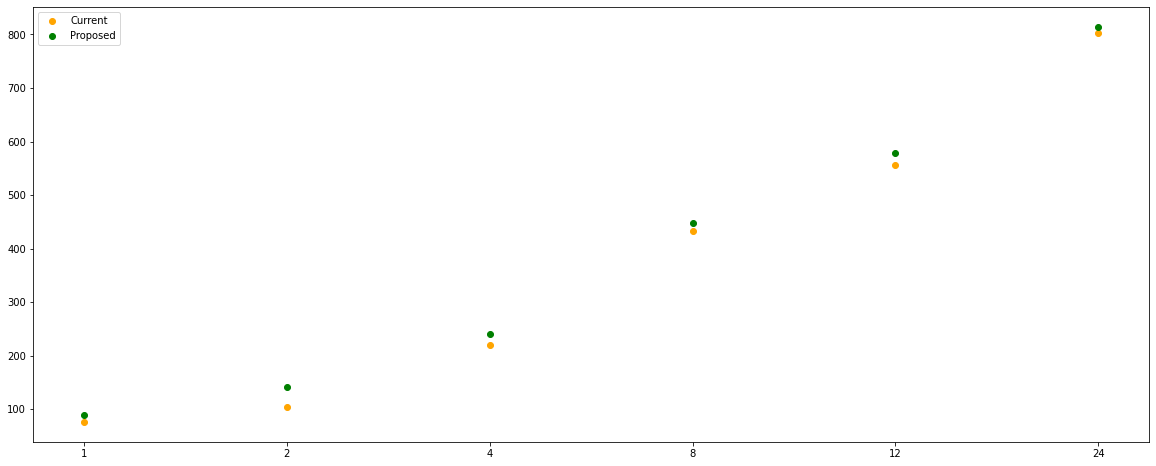

In [45]:
AVERAGE_DELIVERY_VALUE = 4

def referral_fee_current(orders_made: int, vehicle: str, orders_after_28_days: int) -> int:
    """Get the referral fee."""
    if orders_made < 30 or orders_after_28_days < 30:
        return 0
    
    if vehicle == 'Scooter / Motorcycle' or vehicle == 'Bicycle':
        return 100
    elif vehicle == 'Motor Vehicle':
        return 50
    raise ValueError(f"Unknown vehicle {vehicle}")
    

def referral_fee_new(orders_made: int, vehicle: str, orders_after_28_days: int) -> int:
    """Get the referral fee."""
    orders_made = min(orders_made, orders_after_28_days, 100)
    
    if vehicle == 'Scooter / Motorcycle' or vehicle == 'Bicycle':
        ppo = 100 / 100
    elif vehicle == 'Motor Vehicle':
        ppo = 50 / 100
    else:
        raise ValueError(f"Unknown vehicle {vehicle}")
    
    return ppo * orders_made


def profit_made_current(
    orders_made: int,
    vehicle: str,
    orders_after_28_days: int,
    average_delivery_value: float = AVERAGE_DELIVERY_VALUE
):
    """Estimate the profit made from a rider."""
    fee = referral_fee_current(orders_made, vehicle, orders_after_28_days=orders_after_28_days)
    profit = average_delivery_value * orders_made - fee
    return profit


def profit_made_new(
    orders_made: int,
    vehicle: str,
    orders_after_28_days,
    average_delivery_value: float = AVERAGE_DELIVERY_VALUE
):
    """Estimate the profit made from a rider."""
    fee = referral_fee_new(orders_made, vehicle, orders_after_28_days)
    profit = average_delivery_value * orders_made - fee
    return profit
    

x = df_rolled.copy()
x = x[x.IS_RGR]
for day in days:
    x[f'ESTIMATED_PROFIT_CURRENT_CUMULATIVE_{day}'] = x.apply(
        lambda q: profit_made_current(
            q[f'ORDERS_DELIVERED_CUMULATIVE_{day}'],
            q['VEHICLE_TYPE'],
            q[f'ORDERS_DELIVERED_CUMULATIVE_28']
        ), axis=1)
    
    x[f'ESTIMATED_PROFIT_NEW_CUMULATIVE_{day}'] = x.apply(
        lambda q: profit_made_new(
            q[f'ORDERS_DELIVERED_CUMULATIVE_{day}'],
            q['VEHICLE_TYPE'],
            q[f'ORDERS_DELIVERED_CUMULATIVE_28']
        ), axis=1)

x = x[['RIDER_ID', *[f'ESTIMATED_PROFIT_CURRENT_CUMULATIVE_{day}' for day in days], *[f'ESTIMATED_PROFIT_NEW_CUMULATIVE_{day}' for day in days]]]


_ = plt.figure(figsize=(20, 8), facecolor='white')
y1med, y2med = [], []
for day in days:
    y1med.append(x[f'ESTIMATED_PROFIT_CURRENT_CUMULATIVE_{day}'].median())
    y2med.append(x[f'ESTIMATED_PROFIT_NEW_CUMULATIVE_{day}'].median())
    

xx = [i for i in range(len(days))]

plt.scatter(xx, y1med, label='Current', color='orange')
plt.scatter(xx, y2med, label='Proposed', color='green')
plt.xticks(xx, labels=[f"{int(day/7)}" for day in days])
# plt.set_xticklabels([f"{int(day/7)}" for day in days])
#ax1.legend()
plt.legend()

plt.show()
plt.close()

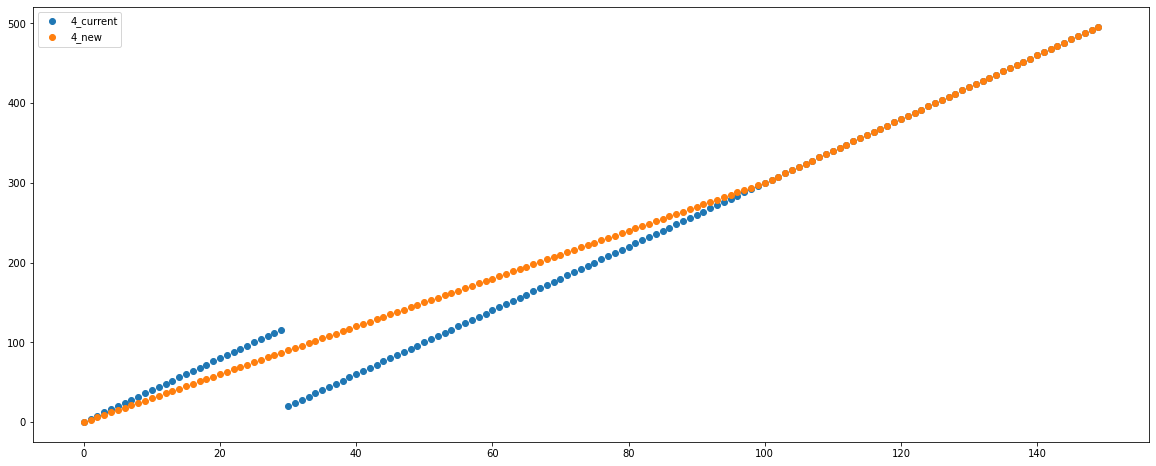

In [48]:
orders_made = [i for i in range(150)]
avgs = [4]
def fee_current(orders_made: int):
    return 0 if orders_made < 30 else 100

def fee_new(orders_made: int):

    return 1 * min(orders_made, 100)

plt.figure(figsize=(20, 8))
for a in avgs:
    y = [a * n - fee_current(n) for n in orders_made]
    plt.scatter(orders_made, y, label=f"{a}_current")
    
    y = [a * n - fee_new(n) for n in orders_made]
    plt.scatter(orders_made, y, label=f'{a}_new')
    
plt.legend()
    

In [76]:
x = df_rolled.copy()
x.loc[x.CHURNED_AFTER.isna(), 'CHURNED_AFTER'] = 168
x[x.ORDERS_DELIVERED_CUMULATIVE_28 >= 28].groupby('IS_RGR').count() / x.groupby('IS_RGR').count()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,CHURNED_AFTER,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,...,REFERRALS_THROUGHPUT_CUMULATIVE_14,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_14,REFERRALS_THROUGHPUT_CUMULATIVE_28,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_28,REFERRALS_THROUGHPUT_CUMULATIVE_56,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56,REFERRALS_THROUGHPUT_CUMULATIVE_84,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,REFERRALS_THROUGHPUT_CUMULATIVE_168,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_168
IS_RGR,,,,,,,,,,,,,,,,,,,,,
False,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,...,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165,0.765165
True,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,...,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069,0.794069


In [78]:
x[x.ORDERS_DELIVERED_CUMULATIVE_28 < 28].groupby('IS_RGR').count() /  x.groupby('IS_RGR').count()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,CHURNED_AFTER,ACQUISITION_CHANNEL,VEHICLE_TYPE,HOURS_WORKED_CUMULATIVE_7,HOURS_WORKED_CUMULATIVE_14,...,REFERRALS_THROUGHPUT_CUMULATIVE_14,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_14,REFERRALS_THROUGHPUT_CUMULATIVE_28,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_28,REFERRALS_THROUGHPUT_CUMULATIVE_56,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56,REFERRALS_THROUGHPUT_CUMULATIVE_84,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_84,REFERRALS_THROUGHPUT_CUMULATIVE_168,SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_168
IS_RGR,,,,,,,,,,,,,,,,,,,,,
False,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,...,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835,0.234835
True,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,...,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931,0.205931


IS_RGR
False    0.473054
True     0.981054
Name: REFERRALS_CUMULATIVE_168, dtype: float64

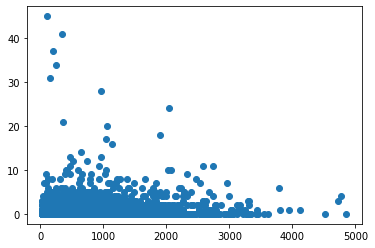

In [96]:
x = df_rolled[df_rolled.ORDERS_DELIVERED_CUMULATIVE_168 > 30]
# x = df_rolled[df_rolled.REFERRALS_CUMULATIVE_168 > 0]
plt.scatter(x=x.ORDERS_DELIVERED_CUMULATIVE_168, y=x.REFERRALS_CUMULATIVE_168)


In [102]:
df_rolled.groupby(['IS_RGR', 'LOCATION']).count() / df_rolled.count()

ACQUISITION_CHANNEL  APPLICATION_APPROVED_DATE  \
IS_RGR LOCATION                                                         
False  Roo Town                   0.058358                   0.058358   
       Roo York                   0.436993                   0.436993   
       Roo de Janeiro             0.264491                   0.264491   
True   Roo Town                   0.002770                   0.002770   
       Roo York                   0.220376                   0.220376   
       Roo de Janeiro             0.017013                   0.017013   

                       APPLICATION_DATE   CHURNED  CHURNED_AFTER  \
IS_RGR LOCATION                                                    
False  Roo Town                0.058358  0.058358       0.033898   
       Roo York                0.436993  0.436993       0.526293   
       Roo de Janeiro          0.264491  0.264491       0.216862   
True   Roo Town                0.002770  0.002770       0.000869   
       Roo York                0.220376  0.220376       0.210778   
       Roo de Janeiro          0.017013  0.017013       0.011299   

                       FIRST_WORK_DATE  HOURS_WORKED_CUMULATIVE_14  \
IS_RGR LOCATION                                                      
False  Roo Town               0.058358                    0.058358   
       Roo York               0.436993                    0.436993   
       Roo de Janeiro         0.264491                    0.264491   
True   Roo Town               0.002770                    0.002770   
       Roo York               0.220376                    0.220376   
       Roo de Janeiro         0.017013                    0.017013   

                       HOURS_WORKED_CUMULATIVE_168  \
IS_RGR LOCATION                                      
False  Roo Town                           0.058358   
       Roo York                           0.436993   
       Roo de Janeiro                     0.264491   
True   Roo Town                           0.002770   
       Roo York                           0.220376   
       Roo de Janeiro                     0.017013   

                       HOURS_WORKED_CUMULATIVE_28  HOURS_WORKED_CUMULATIVE_56  \
IS_RGR LOCATION                                                                 
False  Roo Town                          0.058358                    0.058358   
       Roo York                          0.436993                    0.436993   
       Roo de Janeiro                    0.264491                    0.264491   
True   Roo Town                          0.002770                    0.002770   
       Roo York                          0.220376                    0.220376   
       Roo de Janeiro                    0.017013                    0.017013   

                       ...  SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_56  \
IS_RGR LOCATION        ...                                                  
False  Roo Town        ...                                       0.058358   
       Roo York        ...                                       0.436993   
       Roo de Janeiro  ...                                       0.264491   
True   Roo Town        ...                                       0.002770   
       Roo York        ...                                       0.220376   
       Roo de Janeiro  ...                                       0.017013   

                       SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIVE_7  \
IS_RGR LOCATION                                                       
False  Roo Town                                            0.058358   
       Roo York                                            0.436993   
       Roo de Janeiro                                      0.264491   
True   Roo Town                                            0.002770   
       Roo York                                            0.220376   
       Roo de Janeiro                                      0.017013   

                       SUCCESSFUL_REFERRALS_THROUGHPUT_CUMULATIV